<h1>Project : INVESTIGATE A DATASET</h1>

Name : ELDHOSE PETER <br>
Dataset : Titanic data<br>
Link to data set : https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

<h2>Data Dictionary</h2><br>

Variable :  	Definition<br>                                                  
survival : 	Survival<br>	                                                     
pclass	 :   Ticket class<br>	                                                     
sex	     :  Sex<br>
Age	     :   Age in years<br>
sibsp	 :   # of siblings / spouses aboard the Titanic<br>
parch	 :   # of parents / children aboard the Titanic<br>	
ticket	 :   Ticket number<br>	
fare	 :   Passenger fare<br>	
cabin	 :   Cabin number<br>	
embarked : 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>


Variable Notes<br>

pclass: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>

sibsp   : The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse  = husband, wife (mistresses and fiancés were ignored)<br>

parch  : The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child  = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

 Key<br>
 0 = No, 1 = Yes<br>
 1 = 1st, 2 = 2nd, 3 = 3rd<br>



Reference : https://www.kaggle.com/c/titanic/data <br>

**Importing libraries**

In [1]:

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import time
%matplotlib inline


**Reading The Csv FIle**

In [2]:
f1=pd.read_csv("titanic-data.csv")


<h3>Checking for duplicated rows based on Passenger Id</h3>

In [3]:
f3=f1.duplicated("PassengerId")

f3.value_counts()

False    891
dtype: int64

So there are no duplicate entries.

<h3>Lets see how the data set looks by looking through few rows</h3>

In [4]:
f1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Questions</h2><br>
<b>What is the mean and standard deviation of age data of passengers?<br>      
What is the number of male and female passengers?<br>
 What is the number of male and female survival?<br> 
 What is the number of male and female deaths?<br>  
   What is the proportion of males and females deaths ?<br>
 Which passenger class was most affected?<br>  
 Which passenger class was least affected?<br>  
 Which passenger class had highest number of passengers?<br>
What is the distribution of passengers who survived and did not survive?<br>  
How does age,sex and passenger class affect the fare?<br> 
Did women with children have a better survival rate ?</b>

<h3>What is the mean and standard deviation of age data of passengers?</h3>

**Calculating the mean of age data.**

In [5]:
f1["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**The mean of ages of 714 passengers are 29.7 with standard deviation of 14.53(corrected).**

In [6]:
f1["Age"].count()

714

<h3>So we have age data of only 714 passengers out of 891.</h3>

We need the standard deviation without applying the correction.

In [7]:
f1["Age"].std(ddof=0)

14.516321150817317

<h2>Age distribution of passengers</h2>

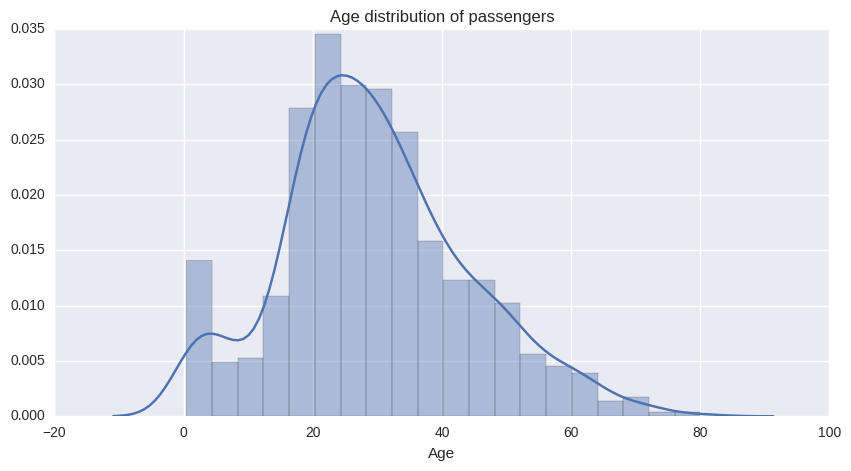

In [8]:
f_=(f1["Age"]).dropna()
plt.figure(figsize=(10,5))
plt.title("Age distribution of passengers")
sns.distplot(f_)

From the graph above, we can see that most of the passengers were aged between 20 to 30 years old. 

<h3>What is the number of male and female passengers?</h3>

In [9]:
f2=f1[['Sex','PassengerId']]

In [10]:
f3=f2.groupby('Sex').count()
f3

,PassengerId
Sex,
female,314
male,577


<h3>So there were 577 males and 314 females.</h3>

**The percentage of males in the ship was 64.76% and the percentage of females in the ship 35.24%.**

<h3>What is the number of male and female deaths?</h3>

In [11]:
f3=f1[['Sex','Survived']]

In [12]:
f3.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [13]:
f5=f3.loc[f3['Survived']==0]
f5.groupby("Sex").count()

,Survived
Sex,
female,81
male,468


<h3>There were 468 male deaths and 81 female deaths.</h3>

<h3>What is the number of male and female survival?</h3>


In [14]:
f4=f3.loc[f3['Survived']==1]

f4.groupby("Sex").count()

,Survived
Sex,
female,233
male,109


<h3>There were 109 males and 233 females  survivors.</h3>

<h2>Age Distribution of Passengers who could not survive</h2>

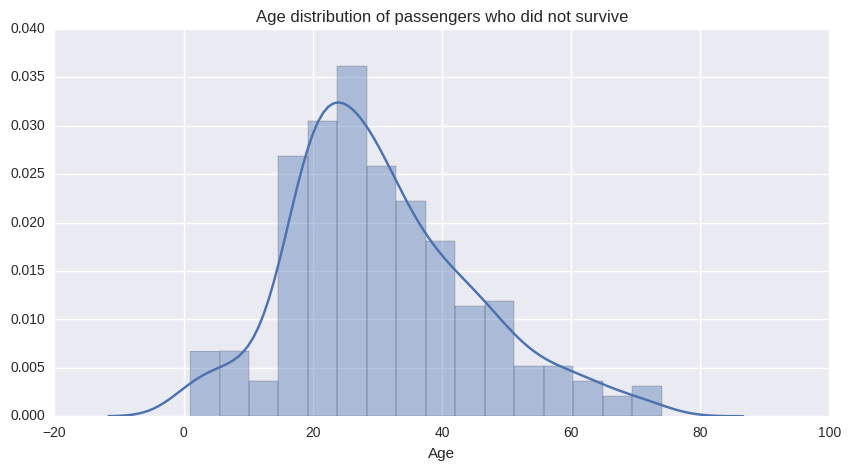

In [15]:
plt.figure(figsize=(10,5))
plt.title("Age distribution of passengers who did not survive")
age_data_death=f1.loc[f1['Survived']==0]
age_=age_data_death['Age'].dropna()
sns.distplot(age_)

<h2>Count of people who were in the ship categorized  based on different passenger classes and sex."</h2>

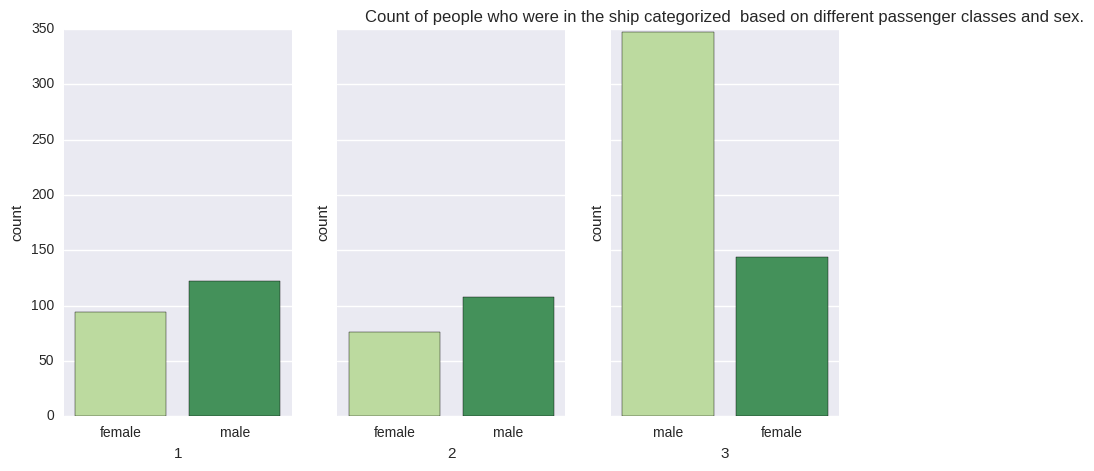

In [16]:
df2=f1[['Sex','Pclass']]
new_df2=df2.pivot(columns='Pclass',values='Sex')
new_df2.head()



f_,(ax1, ax2,ax3) = plt.subplots(1,3, sharey=True,figsize=(10,5))
plt.title("Count of people who were in the ship categorized  based on different passenger classes and sex.")

sns.countplot(data=new_df2,x=1,palette="YlGn",ax=ax1)
sns.countplot(data=new_df2,x=2,palette="YlGn",ax=ax2)
sns.countplot(data=new_df2,x=3,palette="YlGn",ax=ax3)

<h3>From the above graph it is clearly visible that class 3 had highest number of passengers, with number of males significantly higher than other classes</h3>

<b>Considering only people who survived and columns : sex, Pclass</b>

In [17]:
f6=f1.loc[f1['Survived']==1]
f6=f6[['Sex','Pclass']]
f6.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


<b>Using pivot function data is again reshaped</b>

In [18]:
new=f6.pivot(columns='Pclass',values='Sex')
new.head()

Pclass,1,2,3
1,female,None,None
2,None,None,female
3,female,None,None
8,None,None,female
9,None,female,None


<h2>Count of people who could not survive categorized on passenger classes </h2>

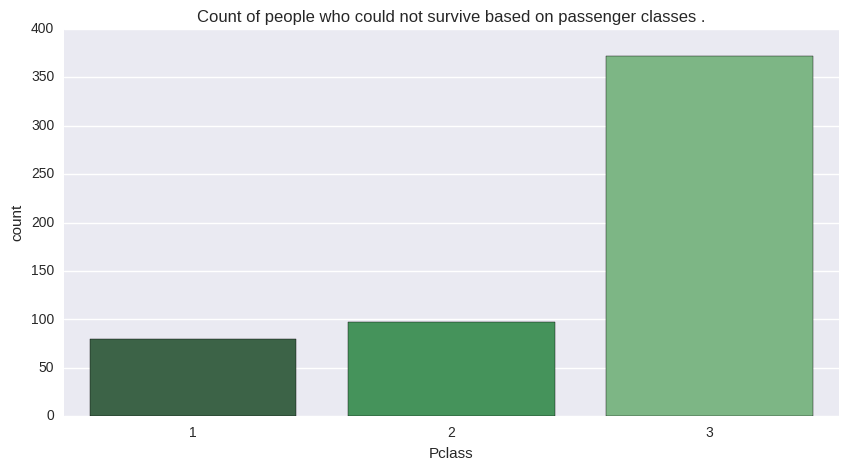

In [19]:
data_=f1.loc[f1['Survived']==0]
data_=data_[['Sex','Pclass']]
plt.figure(figsize=(10,5))
plt.title('Count of people who could not survive based on passenger classes .')
sns.countplot(data=data_,x='Pclass',palette='Greens_d')
plt.show()



<h3>From the above graph it can be clearly seen that Class 3 passengers were most affected and class 1 passengers were least affected.<br>Lets examine this data by plotting it against male and female sexes</h3>

<h2>Count of people who could not survive categorized  based on different passenger classes and sex.</h2>

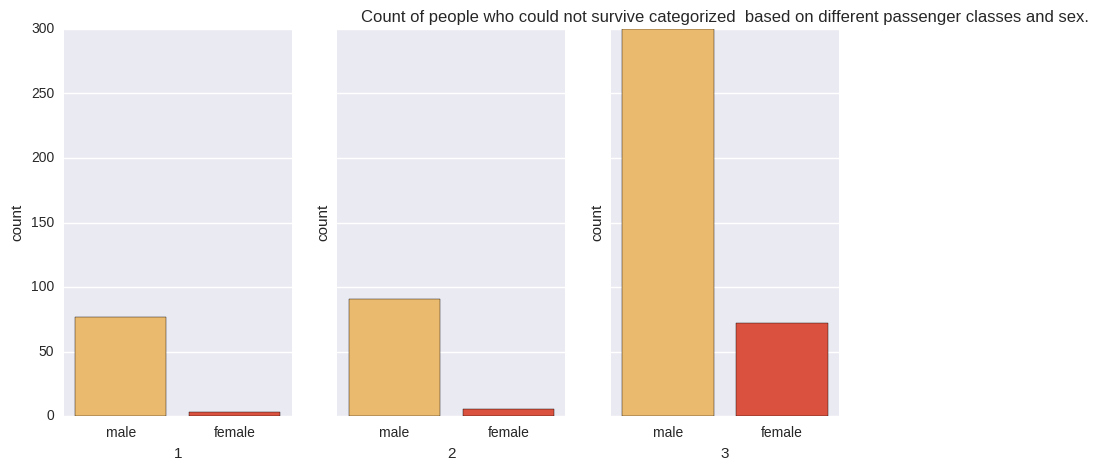

In [20]:
f_d=f1.loc[f1['Survived']==0]
f_d=f_d[['Sex','Pclass']]
new_d=f_d.pivot(columns='Pclass',values='Sex')


f_dea,(ax1, ax2,ax3) = plt.subplots(1,3, sharey=True,figsize=(10,5))
plt.title("Count of people who could not survive categorized  based on different passenger classes and sex.")

sns.countplot(data=new_d,x=1,palette='YlOrRd',ax=ax1)
sns.countplot(data=new_d,x=2,palette='YlOrRd',ax=ax2)
sns.countplot(data=new_d,x=3,palette='YlOrRd',ax=ax3)

<h3>From the above graph , we can clearly see that males were more affected in all three classes. Class 3 had highest number of males and this seems to be the reason why the class 3 was most affected. <br>The code of conduct "Women and children first" can be clearly seen from the graph. </h3> 

In [38]:
f1.groupby(['Pclass', 'Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<h3> Deaths<br>Class1 : 80<br>Class2 : 97<br>Class3 : 372</h3>

<h3>What is the proportion of males and females deaths ?</h3>

In [42]:
f1.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [44]:
f1.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

**The percentage of males who did not survive out of 577 males was found to be 81.12%**

**The percentage of females who did not survive out of 314 females was found to be 25.8%**

<h1>Distributuion Of Males and Females Who Survived And Not Survived</h1>

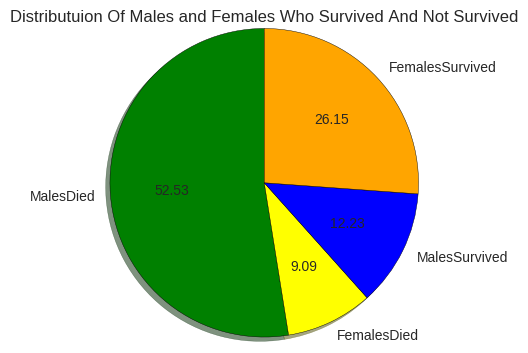

In [33]:
label=['MalesDied','FemalesDied','MalesSurvived','FemalesSurvived']
size=[468/891,81/891,109/891,233/891]
colrs=['green','yellow','blue','orange']
plt.title("Distributuion Of Males and Females Who Survived And Not Survived")
plt.pie(size,labels=label,colors=colrs,autopct='%.2f',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

<b>Percentage of male deaths : 52.53% <br>
Percentage of female deaths : 9.09% <br>
Percentage of males survived : 12.23 <br>
Percentage of females survived : 26.15 <br>
This clearly shows that males were significantly affected.

<h3>Which classes had least  number of deaths and most number of deaths?</h3>

In [41]:
f1.groupby(['Pclass', 'Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

**The number of deaths in class 1,2 and 3 were : 80,97,372 respectively.The number of people who survived in class 1,2 and 3 were 136,87,119 respectively.**

<h1>Distribution Of People Died Categorized based on Different Classes</h1>

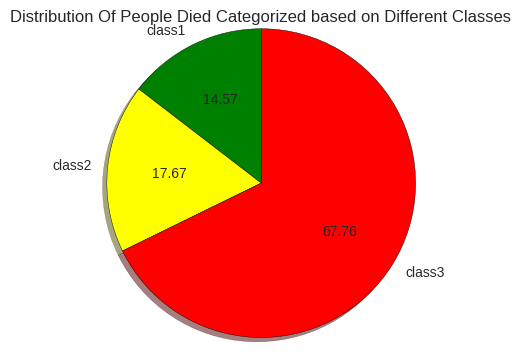

In [34]:
import seaborn as sns
labels=['class1','class2','class3']
sizes=[80/549,97/549,372/549]
colors=['green','yellow','red']
plt.title("Distribution Of People Died Categorized based on Different Classes")
plt.pie(sizes,labels=labels,colors=colors,autopct='%.2f',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

<h2>'Age vs Fare' categorized on basis of sex and passenger class</h2>

<h3>Is there any relationship between age,sex and fare of the passenger in any of the passenger classes?<br>
Lets investigate it by plotting fare and age for both sexes in all three classes.

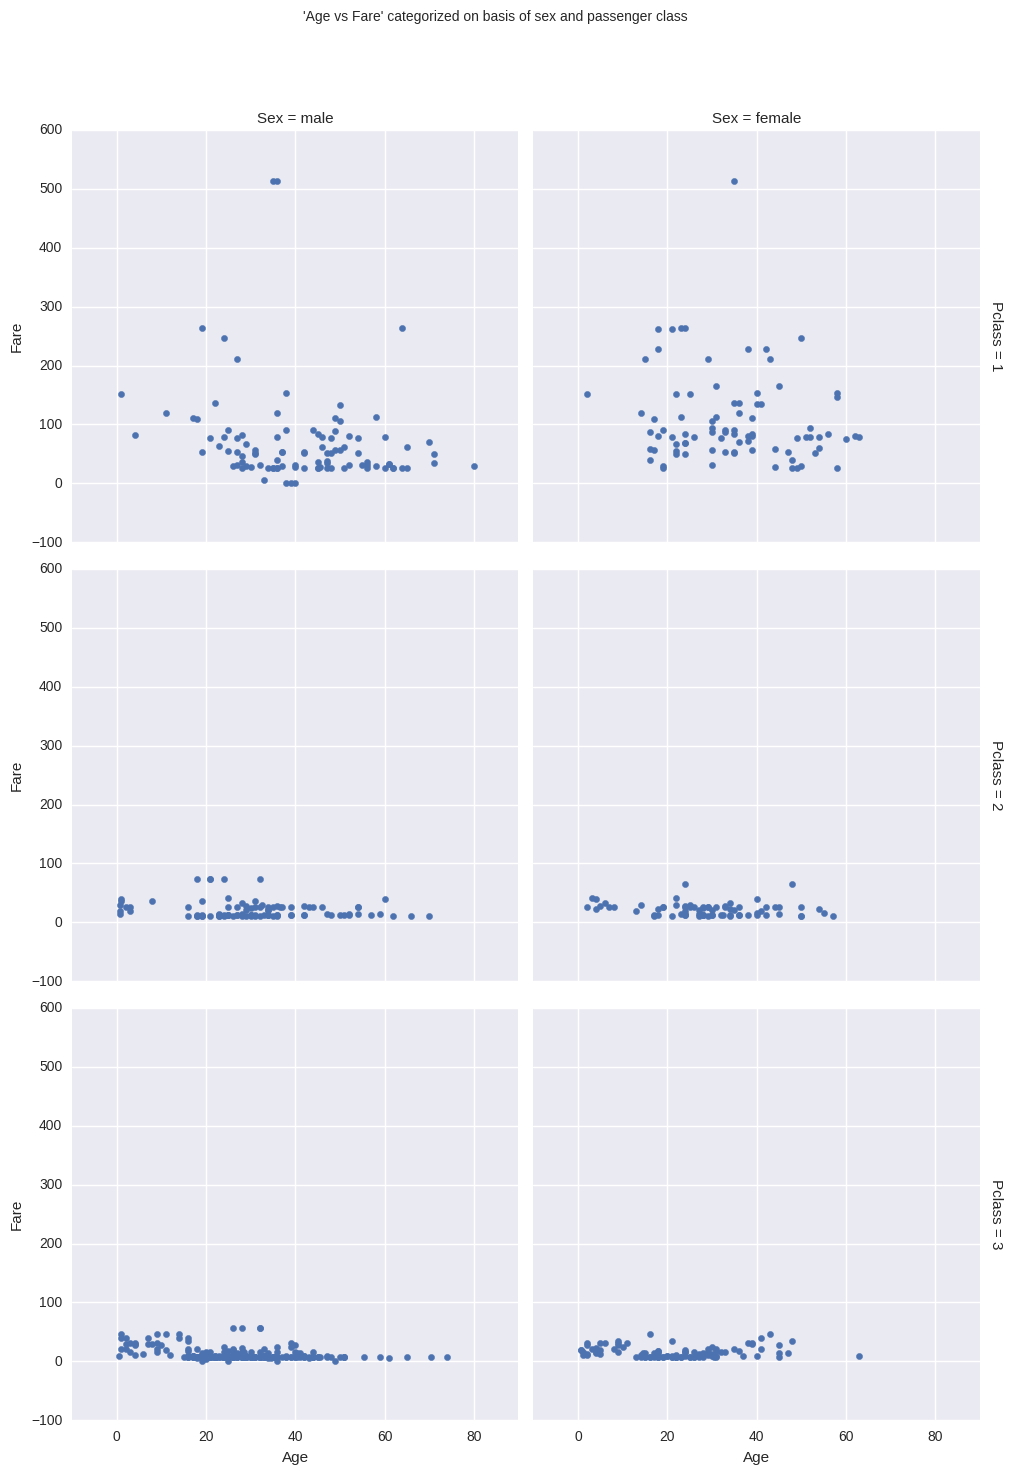

In [58]:
g=sns.FacetGrid(f1[['Sex','Pclass','Age','Fare']],col='Sex',row='Pclass',margin_titles=True,size=5,palette='Greens_d')
g.map(sns.plt.scatter,'Age','Fare')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('\'Age vs Fare\' categorized on basis of sex and passenger class')

The graphs for class 2 and class 3 for both sexes almost look similar,and shows that there is no significant relationship between age and fare.The plots for class 1 also shows that there is no significant relationship between age and fare.So we can conclude that there is no significant relationship between age of passenger and fare.


<h2>Summary</h2>

<b>The results of the analysis,appear to indicate that class and sex, namely, being a female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. Age did not seem to be a major factor. While being a man in third class, gave one the lowest chance of survival.<b><br>

<b>Total number of passengers : 891<br>
Number of male passengers :577 <br>
Number of female passengers : 314<br>
Passenger class with highest number of passengers :Class 3<br>
We have age data of only 714 passengers out of 891.<br>
Number of male deaths : 468<br>
Class1:77<br>
Class2:91<br>
Class3:300<br>
Number of female deaths : 81<br>
Class1:3<br>
Class2:6<br>
Class3:72<br>
Most affected class : Class3<br>
Least affected class : Class1<br>
Male death proportion : 487/577=0.81<br>
Female death proportion : 81/314=0.26<br>
Total percentage of death : 61.61%<br>
Limitations :<br> Its a sample dataset.Based on the 'Parch' definition provided in the data description, Parch - number of parents or children on board, I don't believe it's possible to accurately determine women with children (parents) vs women with their parents onboard.A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers.<b>
